In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the data
train_data=pd.read_excel('Data.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Exploring the dataset

In [3]:
#basic information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
#checking for null values in the dataset
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
#since there are just a couple of null values we can drop them
train_data.dropna(inplace=True)

In [6]:
#final check for null values in the dataset
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

  <h1><center>Feature Engineering</center></h1>

## Date_of_Journey

In [7]:
#converting Date_of_Journey to datetime format
train_data['Date_of_Journey']=pd.to_datetime(train_data['Date_of_Journey'])

In [8]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [9]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
#extracting the month and day from the Date of Journey column
train_data['day_of_journey']=train_data['Date_of_Journey'].dt.day
train_data['month_of_journey']=train_data['Date_of_Journey'].dt.month

In [11]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9


In [12]:
#dropping the date_of_journey column
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [13]:
train_data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1


## Dep_Time and Arrival_Time

In [14]:
##converting Dep_Time and Arrival_Time to datetime format

train_data['Dep_Time']=pd.to_datetime(train_data['Dep_Time'])
train_data['Arrival_Time']=pd.to_datetime(train_data['Arrival_Time'])

In [15]:
train_data.dtypes

Airline                     object
Source                      object
Destination                 object
Route                       object
Dep_Time            datetime64[ns]
Arrival_Time        datetime64[ns]
Duration                    object
Total_Stops                 object
Additional_Info             object
Price                        int64
day_of_journey               int64
month_of_journey             int64
dtype: object

In [16]:
#extracting hours and minutes from the departure and arrival times
train_data['Dep_time_hr']=train_data['Dep_Time'].dt.hour
train_data['Dep_time_minute']=train_data['Dep_Time'].dt.minute
train_data['Arr_time_hr']=train_data['Arrival_Time'].dt.hour
train_data['Arr_time_minute']=train_data['Arrival_Time'].dt.minute

In [17]:
#dropping the dep_time and arrival_time columns
train_data.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [18]:
train_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25


## Duration

In [19]:
def duration_preprocess(value):
    lst=value.split()
    if len(lst)==2:     # if both the hours and minutes are present return it
        return value
    else:
        if 'h' in value:  # if only hour is present append 0m
            return value+' 0m'
        else:             # if only minute is present add 0h in the front
            return '0h '+value

In [20]:
#applying the function on the entire Duration column
train_data['Duration']=train_data['Duration'].apply(duration_preprocess)

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [22]:
# extracting the hours and minutes from duration
train_data['duration_hours']=train_data['Duration'].apply(lambda x:int(x.split()[0][:-1]))
train_data['duration_minutes']=train_data['Duration'].apply(lambda x:int(x.split()[1][:-1]))

In [23]:
train_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0


In [24]:
#dropping the duration column
train_data.drop('Duration',axis=1,inplace=True)

In [25]:
#remaining columns having object datatype
train_data.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

## Total stops

In [26]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [27]:
# mapping non-stop to 0, 1 stop to 1, 2 stops to 2, 3 stops to 3, and 4 stops to 4
train_data['Total_Stops']=train_data['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [28]:
train_data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,19,0


In [29]:
#remaining columns having object datatype
train_data.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info'], dtype='object')

## Additional Info

In [30]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [31]:
# Almost 80% of the values have no-info in the additional info column and hence does not provide any necessary insights
train_data.drop('Additional_Info',inplace=True,axis=1)
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Price,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,5,1,5,50,13,15,7,25


In [32]:
#remaining columns having object datatype
train_data.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

## Airline

In [33]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

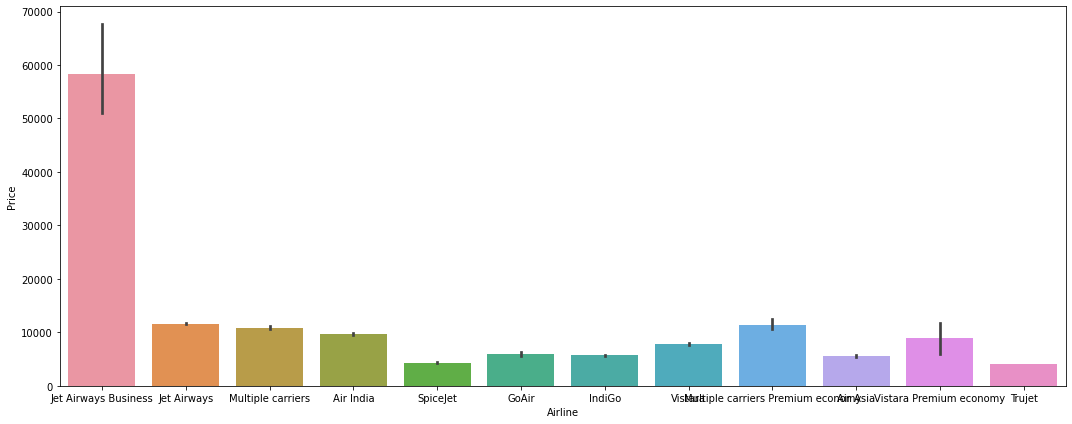

In [34]:
plt.figure(figsize=(15,6))
sns.barplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))
plt.tight_layout()

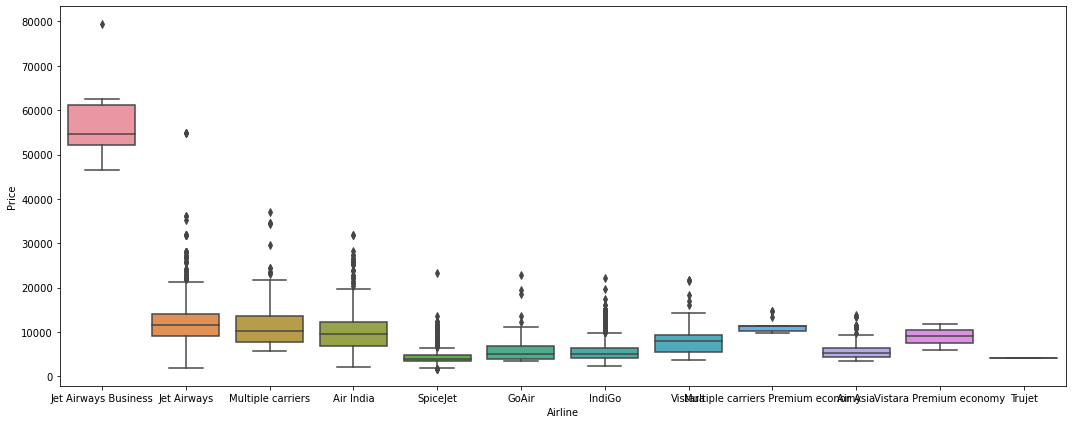

In [35]:
# boxplot of Airline vs Price for statistical analysis
plt.figure(figsize=(15,6))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))
plt.tight_layout()

In [36]:
#statistical data for the above box plot
train_data.groupby('Airline').describe()['Price'].sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Jet Airways Business,6.0,58358.666667,11667.596748,46490.0,52243.0,54747.0,61122.50,79512.0
Jet Airways,3849.0,11643.923357,4258.940578,1840.0,9134.0,11467.0,14151.00,54826.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.0,11269.0,11269.00,14629.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.0,10197.0,13587.00,36983.0
Air India,1751.0,9612.427756,3901.734561,2050.0,6891.0,9443.0,12219.00,31945.0
Vistara Premium economy,3.0,8962.333333,2915.405518,5969.0,7547.0,9125.0,10459.00,11793.0
Vistara,479.0,7796.348643,2914.298578,3687.0,5403.0,7980.0,9345.00,21730.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
IndiGo,2053.0,5673.682903,2264.142168,2227.0,4226.0,5000.0,6494.00,22153.0


**Here we can use OneHotEncoding for converting the categorical airline column to integer values**

In [37]:
Airline=pd.get_dummies(train_data['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [38]:
#concatinating the Airline dataframe with the train_data dataframe
train_data=pd.concat([train_data,Airline],axis=1)
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Price,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,22,20,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,5,1,5,50,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#dropping the Airline column
train_data.drop('Airline',axis=1,inplace=True)

In [40]:
#train_data.head(2)

## Source and Destination

In [41]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [42]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

**We can use OneHotEncoding for Source and Destination columns because there are only 5 and 6 different values respectively**

In [43]:
# Using get_dummies method of pandas for OneHotEncoding
train_data=pd.get_dummies(data=train_data,columns=['Source','Destination'],drop_first=True)

In [44]:
train_data.head(2)

,Route,Total_Stops,Price,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,duration_hours,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,3897,24,3,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2,7662,5,1,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0


In [45]:
# all features of train_data
train_data.columns

Index(['Route', 'Total_Stops', 'Price', 'day_of_journey', 'month_of_journey',
       'Dep_time_hr', 'Dep_time_minute', 'Arr_time_hr', 'Arr_time_minute',
       'duration_hours', 'duration_minutes', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [46]:
# remaining columns of object datatype
train_data.select_dtypes(['object']).columns

Index(['Route'], dtype='object')

## Route

In [47]:
route=train_data.select_dtypes(['object'])
route.head()

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL


In [48]:
train_data['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

**Here there are maximum 4 stops for a flight and hence the number of routes would be 5 (a -> b -> c -> d -> e -> f)**

In [49]:
route['Route_1']=route['Route'].str.split('→').str[0]
route['Route_2']=route['Route'].str.split('→').str[1]
route['Route_3']=route['Route'].str.split('→').str[2]
route['Route_4']=route['Route'].str.split('→').str[3]
route['Route_5']=route['Route'].str.split('→').str[4]

C:\Users\DHWANI~1\AppData\Local\Temp/ipykernel_7840/1832926007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_1']=route['Route'].str.split('→').str[0]
C:\Users\DHWANI~1\AppData\Local\Temp/ipykernel_7840/1832926007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_2']=route['Route'].str.split('→').str[1]
C:\Users\DHWANI~1\AppData\Local\Temp/ipykernel_7840/1832926007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [50]:
route.head()

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,BLR,NAG,DEL,NaN,NaN


In [51]:
# fill the NaN values with None
route.fillna('None',inplace=True)
route.head()

C:\Users\DS\anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,None,None,None
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,None
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,None
3,CCU → NAG → BLR,CCU,NAG,BLR,None,None
4,BLR → NAG → DEL,BLR,NAG,DEL,None,None


In [52]:
for i in range(1,6):
    col='Route_'+str(i)
    val=route[col].nunique()
    print(f'Number of categories in {col} is: {val}')

Number of categories in Route_1 is: 5
Number of categories in Route_2 is: 45
Number of categories in Route_3 is: 30
Number of categories in Route_4 is: 14
Number of categories in Route_5 is: 6


**As we can see there are too many categories and hence OneHotEncoding would not be a good option, so we would use Label Encoding**

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
label_encoder=LabelEncoder()

In [55]:
for i in range(1,6):
    col='Route_'+str(i)
    route[col]=label_encoder.fit_transform(route[col])

C:\Users\DHWANI~1\AppData\Local\Temp/ipykernel_7840/3691453474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col]=label_encoder.fit_transform(route[col])


In [56]:
route.head()

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,0,13,29,13,5
1,CCU → IXR → BBI → BLR,2,25,1,3,5
2,DEL → LKO → BOM → COK,3,32,4,5,5
3,CCU → NAG → BLR,2,34,3,13,5
4,BLR → NAG → DEL,0,34,8,13,5


In [57]:
# dropping the Route column
route.drop('Route',inplace=True,axis=1)
route.head(2)

C:\Users\DS\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,13,29,13,5
1,2,25,1,3,5


In [58]:
# concatinating route and train_data
train_data=pd.concat([train_data,route],axis=1)
train_data.head(2)

,Route,Total_Stops,Price,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,duration_hours,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,0,3897,24,3,22,20,1,10,2,...,0,0,0,0,1,0,13,29,13,5
1,CCU → IXR → BBI → BLR,2,7662,5,1,5,50,13,15,7,...,0,0,0,0,0,2,25,1,3,5


In [59]:
# dropping the route column from train_data
train_data.drop('Route',inplace=True,axis=1)
train_data.head(2)

,Total_Stops,Price,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,duration_hours,duration_minutes,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,1,0,13,29,13,5
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,0,0,2,25,1,3,5


In [60]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Price                              10682 non-null  int64
 2   day_of_journey                     10682 non-null  int64
 3   month_of_journey                   10682 non-null  int64
 4   Dep_time_hr                        10682 non-null  int64
 5   Dep_time_minute                    10682 non-null  int64
 6   Arr_time_hr                        10682 non-null  int64
 7   Arr_time_minute                    10682 non-null  int64
 8   duration_hours                     10682 non-null  int64
 9   duration_minutes                   10682 non-null  int64
 10  Air India                          10682 non-null  uint8
 11  GoAir                              10682 non-null  uint8
 12  IndiGo            

**All columns have been converted to numerical datatype but one last thing that we need to check is if there are any outliers in the dataset**

## Outlier detection

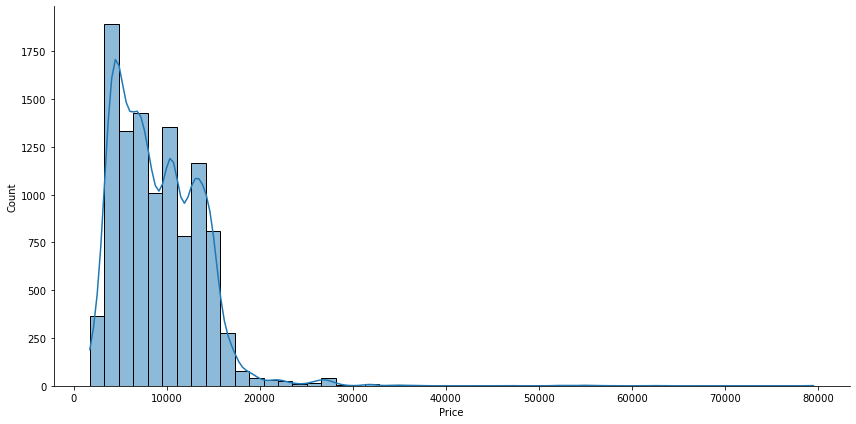

In [61]:
sns.displot(train_data['Price'],bins=50,aspect=2,height=6,kde=True)

In [62]:
train_data[train_data['Price']>40000]

,Total_Stops,Price,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,duration_hours,duration_minutes,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
657,1,52229,3,1,5,45,10,45,5,0,...,0,0,0,0,1,0,7,8,13,5
1478,1,54826,18,3,18,40,0,45,6,5,...,0,0,0,0,1,0,7,8,13,5
2618,1,54826,18,3,22,50,5,5,6,15,...,0,0,0,0,1,0,7,8,13,5
2924,1,79512,3,1,5,45,11,25,5,40,...,0,0,0,0,1,0,7,8,13,5
5372,1,62427,3,1,5,45,12,25,6,40,...,0,0,0,0,1,0,7,8,13,5
5439,1,54826,3,1,16,55,23,0,6,5,...,0,0,0,0,1,0,7,8,13,5
7351,2,46490,3,3,20,5,4,25,8,20,...,1,0,0,0,0,3,1,4,5,5
9715,2,52285,3,6,20,5,4,25,8,20,...,1,0,0,0,0,3,1,4,5,5
10364,1,57209,3,1,9,45,14,25,4,40,...,0,0,0,0,1,0,33,8,13,5


**Here we can see a few outliers having airfare more than 40000 and hence would reduce the accuracy of machine learning models, so it would be better to replace them with the median price of the entire dataset**

In [63]:
# replacing airfare of more than 40000 with the median price
train_data['Price']=np.where(train_data['Price']>40000,train_data['Price'].median(),train_data['Price'])

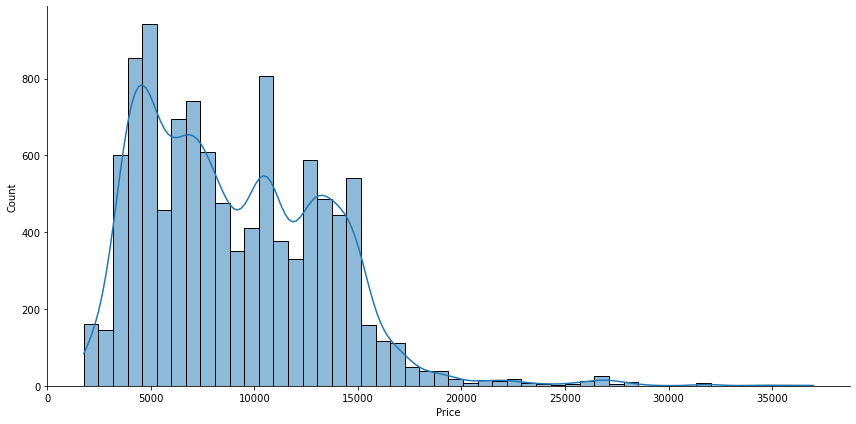

In [64]:
sns.displot(train_data['Price'],bins=50,aspect=2,height=6,kde=True)

**Now we are ready to train the machine learning models**

In [65]:
#saving the processed data in a csv file for further usage
train_data.to_csv('processed_data.csv')